This file is used to test betabinomial works or not.

In [1]:
from scipy.io import mmread
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np
from scipy.sparse import coo_matrix, csr_matrix

In [1]:
## Visualize the allel frequency of each selected SNPs (compared with MQuad)

In [2]:
## MQuad
sample = "gct98"
AD_bin = mmread("/home/linxy29/data/maester/oagct/" + sample + "/maester_mquad/passed_ad.mtx")
DP_bin = mmread("/home/linxy29/data/maester/oagct/" + sample + "/maester_mquad/passed_dp.mtx")
# read the variant names txt file
with open("/home/linxy29/data/maester/oagct/" + sample + "/maester_mquad/passed_variant_names.txt", "r") as f:
    var_names_bin = f.readlines()
    # remove the newline character
    var_names_bin = [x.strip() for x in var_names_bin]
AD_bin.shape
var_names_bin[0:5]

['9203C>A', '2352T>A', '9205T>A', '8279T>G', '15690T>C']

In [4]:
## MQuad2
AD_betabin = mmread("/home/linxy29/data/maester/oagct/" + sample + "/maester_betamquad/passed_ad.mtx")
DP_betabin = mmread("/home/linxy29/data/maester/oagct/" + sample + "/maester_betamquad/passed_dp.mtx")
# read the variant names txt file
with open("/home/linxy29/data/maester/oagct/" + sample + "/maester_betamquad/passed_variant_names.txt", "r") as f:
    var_names_betabin = f.readlines()
    # remove the newline character
    var_names_betabin = [x.strip() for x in var_names_betabin]
AD_betabin.shape
var_names_betabin[0:5]

['11790T>C', '2352T>A', '2349G>A', '9205T>A', '1380G>A']

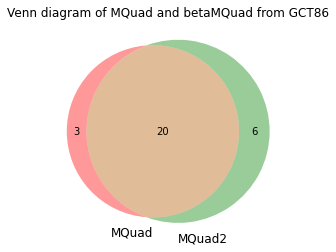

In [5]:
# plot the venndiagram of variants selected by MQuad and MQuad2
venn2([set(var_names_bin), set(var_names_betabin)], set_labels = ('MQuad', 'MQuad2'))
# Add a title
plt.title('Venn diagram of MQuad and betaMQuad from GCT86')

# Save the plot
plt.savefig('analysis_plots/venn_diagram.png')
plt.show()

In [6]:
# plot the allel frequency of each selected SNPs
AF_bin = AD_bin / DP_bin
AF_betabin = AD_betabin / DP_betabin
print(AF_bin[0:5, 0:5])
print(AF_bin.shape)

[[0.01714286 0.28       0.00990099 0.01818182 0.01098901]
 [0.05263158 0.05531915 0.01069519 0.04104478 0.04464286]
 [0.         0.         0.         0.         0.        ]
 [0.0173913  0.02479339 0.01058201 0.02222222 0.02631579]
 [0.19631902 0.19130435 0.15662651 0.1484375  0.09722222]]
(23, 1283)


In [7]:
# Check the number of zeors in each row
# Convert the matrix to CSR format for row-wise operations
AF_csr = csr_matrix(AF_bin)
# Get the number of columns
num_cols = AF_csr.shape[1]
# Calculate the number of zeros in each row
num_zeros = num_cols - AF_csr.getnnz(axis=1)
print(num_zeros/AF_csr.shape[1])
# Check the number of zeors in each row
AF_csr = csr_matrix(AF_betabin)
num_cols = AF_csr.shape[1]
num_zeros = num_cols - AF_csr.getnnz(axis=1)
print(num_zeros/AF_csr.shape[1])

[0.19407638 0.00935308 0.95557288 0.10989867 0.         0.95479345
 0.03507405 0.02727981 0.04286828 0.04286828 0.32969602 0.29773967
 0.06547155 0.35619641 0.30631333 0.44660951 0.25097428 0.00389712
 0.03273578 0.91036633 0.36944661 0.14185503 0.36165238]
[0.19407638 0.00935308 0.10989867 0.         0.03507405 0.02727981
 0.04286828 0.04286828 0.32969602 0.29773967 0.06547155 0.35619641
 0.30631333 0.44660951 0.25097428 0.00389712 0.03273578 0.36944661
 0.14185503 0.36165238 0.35307872 0.07560405 0.28838659 0.00233827
 0.00155885 0.02883866]


/home/linxy29/.conda/envs/maester/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6607: RuntimeWarning: All-NaN axis encountered
  xmin = min(xmin, np.nanmin(xi))
/home/linxy29/.conda/envs/maester/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6608: RuntimeWarning: All-NaN axis encountered
  xmax = max(xmax, np.nanmax(xi))


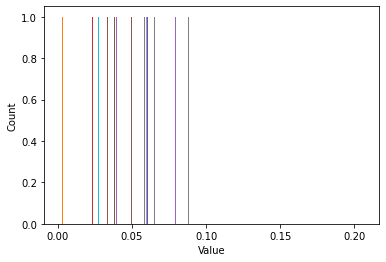

In [50]:
# plot the distribution of AF for each variant
plt.figure()
plt.hist(AF_bin[1,:], bins = 20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('analysis_plots/histograms.png')

[[0.01714286 0.28       0.00990099 0.01818182 0.01098901]
 [0.05263158 0.05531915 0.01069519 0.04104478 0.04464286]
 [0.         0.         0.         0.         0.        ]
 [0.0173913  0.02479339 0.01058201 0.02222222 0.02631579]
 [0.19631902 0.19130435 0.15662651 0.1484375  0.09722222]]


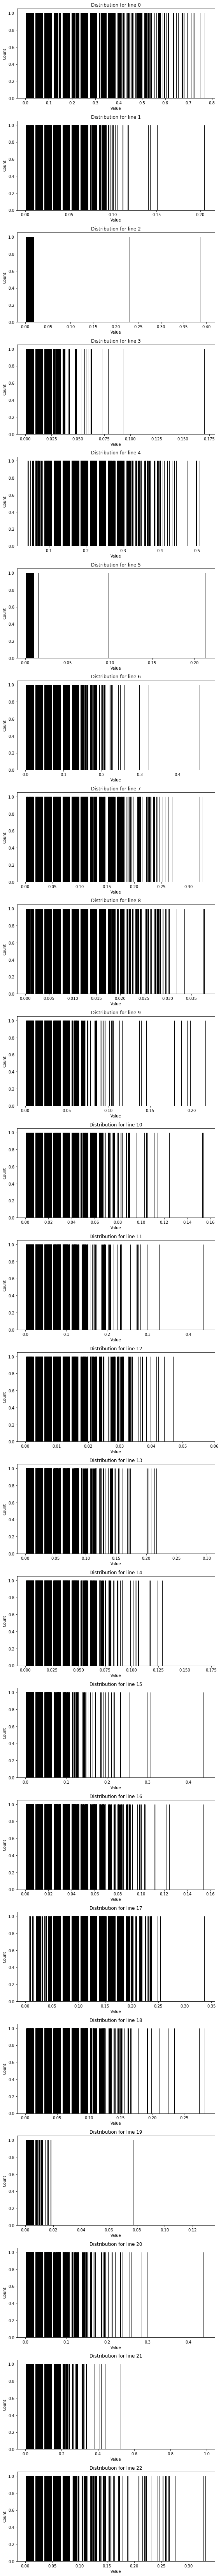

In [29]:
# Create a grid of subplots
fig, axs = plt.subplots(AF_bin.shape[0], 1, figsize=(8, 4*AF_bin.shape[0]))
# Loop through each row of AF_bin
for i in range(AF_bin.shape[0]):
    # Plot the histogram on the corresponding subplot
    axs[i].hist(AF_bin[i], bins=20, edgecolor='black')
    axs[i].set_title(f'Distribution for line {i}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Count')

# Adjust the spacing between subplots
fig.tight_layout()

# Save the plot to a file
plt.savefig('histograms.png')

In [26]:
np.max(AF_bin)

nan

In [ ]:

# the common SNPs
common_var = set(var_names_bin).intersection(var_names_betabin)

# the SNPs only selected by MQuad
only_bin = set(var_names_bin).difference(var_names_betabin)
# the SNPs only selected by MQuad2
only_betabin = set(var_names_betabin).difference(var_names_bin)